In [1]:
'''
This code imports numpy packages and allows us to pass data from python to global javascript
objects. It was developed by znah@github
'''

import json
import numpy as np
import numpy.random as rd
from ipywidgets import widgets
from IPython.display import HTML, Javascript, display

def json_numpy_serializer(o):
    if isinstance(o, np.ndarray):
        return o.tolist()
    raise TypeError("{} of type {} is not JSON serializable".format(repr(o), type(o)))

def jsglobal(**params):
    code = [];
    for name, value in params.items():
        jsdata = json.dumps(value, default=json_numpy_serializer)
        code.append("window.{}={};".format(name, jsdata))
    display(Javascript("\n".join(code)))

In [2]:
%%javascript

// Loading the compiled MathBox bundle.
require.config({
    //baseUrl:'', paths: {mathBox: '../../tree/static/mathbox/build/mathbox-bundle'}
    // online compilation
    baseUrl: '', paths: {mathBox: '../static/mathbox/build/mathbox-bundle'}
    // online compilation without local library-- remove baseUrl
    //paths: {mathBox: '//cdn.rawgit.com/unconed/mathbox/eaeb8e15/build/mathbox-bundle'}
});

// Minified graphing functions

window.with_mathbox=function(element,func){require(['mathBox'],function(){var mathbox=mathBox({plugins:['core','controls','cursor','mathbox'],controls:{klass:THREE.OrbitControls},mathbox:{inspect:!1},element:element[0],loop:{start:!1},});var three=mathbox.three;three.renderer.setClearColor(new THREE.Color(0xFFFFFF),1.0);three.camera.position.set(-1,1,2);three.controls.noKeys=!0;three.element.style.height="400px";three.element.style.width="100%";function isInViewport(element){var rect=element.getBoundingClientRect();var html=document.documentElement;var w=window.innerWidth||html.clientWidth;var h=window.innerHeight||html.clientHeight;return rect.top<h&&rect.left<w&&rect.bottom>0&&rect.right>0}
var intervalId=setInterval(function(){if(three.element.offsetParent===null){clearInterval(intervalId);three.destroy();return}
var visible=isInViewport(three.canvas);if(three.Loop.running!=visible){visible?three.Loop.start():three.Loop.stop()}},100);func(mathbox);window.dispatchEvent(new Event('resize'))})};window.plotGraph=function(mathbox,f,xlabel='x',ylabel='y',zlabel='f(x,y)',rng=[[-3,3],[-5,5],[-3,3]]){var view=mathbox.cartesian({range:rng,scale:[1,1,1]},{rotation:(t)=>[0,t*0.02,0]}).grid({axes:[1,3]})
view.area({id:'yaxis',width:1,height:1,axes:[1,3],expr:function(emit,x,y,i,j){emit(4,0,0);emit(0,0,0)},items:2,channels:3,}).text({font:'Helvetica',style:'bold',width:16,height:5,depth:2,expr:function(emit,i,j,k,time){emit(ylabel)},}).label({color:'#000000',snap:!1,outline:2,size:24,offset:[0,-32],depth:.5,zIndex:1});view.vector({points:'#yaxis',color:0x000000,width:9,start:!0});view.area({id:'xaxis',width:1,height:1,axes:[1,3],expr:function(emit,x,y,i,j){emit(0,0,4);emit(0,0,0)},items:2,channels:3,}).text({font:'Helvetica',style:'bold',width:16,height:5,depth:2,expr:function(emit,i,j,k,time){emit(xlabel)},}).label({color:'#000000',snap:!1,outline:2,size:24,offset:[0,-32],depth:.5,zIndex:1,});view.vector({points:'#xaxis',color:0x000000,width:9,start:!0,});view.area({id:'zaxis',width:1,height:1,axes:[1,3],expr:function(emit,x,y,i,j){emit(0,4,0);emit(0,0,0)},items:2,channels:3,}).text({font:'Helvetica',style:'bold',width:16,height:5,depth:2,expr:function(emit,i,j,k,time){emit(zlabel)},}).label({color:'#000000',snap:!1,outline:2,size:24,offset:[0,-32],depth:.5,zIndex:1,});view.vector({points:'#zaxis',color:0x000000,width:9,start:!0,});var graph=view.area({id:'graph',width:64,height:64,axes:[1,3],expr:function(emit,y,x,i,j){emit(y,f(x,y),x)},items:1,channels:3,});view.surface({shaded:!0,lineX:!0,lineY:!0,points:graph,color:0x0000FF,width:1,});return view};window.addSegment=function(view,p0,p1,col){view.array({width:128,expr:function(emit,i,time){var b=i/128;var a=1-b;emit(a*p0[1]+b*p1[1],a*p0[2]+b*p1[2],a*p0[0]+b*p1[0])},channels:3,});view.line({color:col,width:10,size:2.5,stroke:'dotted',start:!1,end:!1,})};window.addPoint=function(view,p,col,label){view.array({width:4,items:2,channels:3,expr:function(emit,i,t){emit(p[1],p[2],p[0])},}).point({color:col,points:'<',size:15,depth:.5,zBias:50,}).text({font:'Helvetica',style:'bold',width:16,height:5,depth:2,expr:function(emit,i,j,k,time){emit(label)},}).label({color:col,snap:!1,outline:2,size:24,offset:[0,-32],depth:.5,zIndex:1,})};window.addCurve=function(view,ab,x,y,z,col){view.array({width:128,expr:function(emit,i,time){var t=(ab[1]-ab[0])*(i/128)+ab[0];emit(y(t),z(t),x(t))},channels:3,});view.line({color:col,width:20,size:2.5,start:!0,end:!0,})};window.addClosedCurve=function(view,ab,x,y,z,col){view.array({width:128,expr:function(emit,i,time){var t=(ab[1]-ab[0])*(i/128)+ab[0];emit(y(t),z(t),x(t))},channels:3,});view.line({color:col,width:20,size:2.5,start:!1,end:!1,})};window.addSurface=function(view,ab,cd,x,y,z,col,opa){view.matrix({width:64,height:64,expr:function(emit,i,j,time){var p=(ab[1]-ab[0])*(i/64)+ab[0];var q=(cd[1]-cd[0])*(j/64)+cd[0];emit(y(p,q),z(p,q),x(p,q))},items:1,channels:3}).surface({shaded:!0,lineX:!1,lineY:!1,color:col,width:1,opacity:opa})}
window.addSequence=function(view,seq,col){var idx=0;var d=new Date();var start=d.getTime();view.array({width:1,expr:function(emit,i,time){var nd=new Date();var now=nd.getTime();if(1000<now-start){idx=idx+1;if(seq.length<=idx){idx=0}
start=now}
emit(seq[idx][1],seq[idx][2],seq[idx][0])},items:1,channels:3}).point({color:col,points:'<',size:15,depth:.5,zBias:50,})}

<IPython.core.display.Javascript object>

# Part VII: Constrained Bivariate Optimization

Lagrange multipliers provide a complete picture for bivariate optimization with one equality constraint. On the other hand, it is not immediately clear how to solve such programs with iterative methods. This is because such iterative methods require that we increase the dimensionality of our optimization program, which we will do in the future.

## Optimization with a single inequality constraint

Inequality constrained optimization is an interesting mixture of the unconstrained and inequality constrained programs. Consider the program

$$
\min \frac{1}{2}\Vert {\bf x} - {\bf 1}\Vert^2 \text{ subject to } \Vert {\bf x}\Vert^2\leq 1,
$$

where ${\bf 1}\in\mathbb{R}^2$ is the vector whose entries are all $1$'s. If ${\bf x}^\ast$ is a solution to this program, then either $\Vert x^{\ast}\Vert^2=1$ for $\Vert x^{\ast}\Vert^2 < 1$. In the former case, we say that the constraint is **binding** and in the latter case we say that the constraint is **non-binding** or **not binding**. More informally, we say that the solution is **on the boundary** of the feasible region or is **inside** the feasible region to convey the geometric intuition. 

In [3]:
%%javascript

with_mathbox(element, function(mathbox) {
    
    var fcn = function(x, y) {
        return (Math.pow(x-1,2) + Math.pow(y-1, 2))/2;
    }
    
    var view = plotGraph(mathbox, fcn, 'x', 'y', 'f(x,y)', [[-2, 2], [-1, 3], [-2, 2]]);
     
    addClosedCurve(view,
             [0, 6.4],
             function(t){return Math.cos(t);},
             function(t){return Math.sin(t);},
             function(t){return 0;},
             0x3090FF
            );
    
    addClosedCurve(view,
             [0, 6.4],
             function(t){return Math.cos(t);},
             function(t){return Math.sin(t);},
             function(t){return fcn(Math.cos(t), Math.sin(t));},
             0xFF8C00
            );
    
    addSurface(view, 
               [0, 6.4],
               [0, 1],
              function(s, t) {return t*Math.cos(s);},
              function(s, t) {return t*Math.sin(s);},
              function(s, t) {return 0;},
              0x3090FF,
              0.75)
    
    addSurface(view, 
               [0, 6.4],
               [0, 1],
              function(s, t) {return t*Math.cos(s);},
              function(s, t) {return t*Math.sin(s);},
              function(s, t) {return fcn(t*Math.cos(s), t*Math.sin(s));},
              0xFF8C00,
              0.9)
})

<IPython.core.display.Javascript object>


Let's set $f({\bf x})=\frac{1}{2}\Vert {\bf x} - {\bf 1}\Vert^2$ and $h({\bf x})=\Vert x\Vert^2 -1$. Note that the constraint for this program is equivalent to $h({\bf x})\leq 0$. If the constraint is binding, then ${\bf x}^\ast$ is also a solution to
$$
\min \frac{1}{2}\Vert {\bf x} - {\bf 1}\Vert^2\text{ subject to } h({\bf x})=0,
$$
and hence the theory of Lagrange multipliers applies. If the constraint is not binding, we note that $h({\bf x})$ is a continuous function and thus
$$
\{{\bf x}\in \mathbb{R}^2: h({\bf x})<0\}
$$
is an *open* set. Consequently, ${\bf x}^\ast$ must statisfy the necessary conditions for optimality in the *unconstrained program*
$$
\min \frac{1}{2}\Vert {\bf x} - {\bf 1}\Vert^2
$$
in addition to the constraint $\Vert {\bf x}^\ast\Vert \leq 1$. In summary, we have that either:

1. $h({\bf x}^\ast)=0$, in which case $\nabla h({\bf x}^\ast)\not={\bf 0}$ implies $\displaystyle \nabla f({\bf x}) + \lambda \nabla h({\bf x}^\ast)=0$ or
2. $\nabla f({\bf x}^\ast)=0$ and $\Vert {\bf x}^\ast\Vert \leq 1$ ($h({\bf x}^\ast)=0$). 

Therefore, we need to identify all points satisfying either of the following conditions:

1. $\nabla f({\bf x})={\bf 0}$ and $h({\bf x})<0$, 
2. $h({\bf x})=0$, $\nabla h({\bf x})\not={\bf 0}$, and there is a $\lambda\in\mathbb{R}$ with $\nabla f({\bf x})+\lambda \nabla h({\bf x})={\bf 0}$, or
3. $h({\bf x})=0$, but $\nabla h({\bf x})={\bf 0}$.

In the second case, we should also have that $\lambda\geq 0$. This is because $\lambda < 0$ implies that $f({\bf x}) = -\lambda \nabla h({\bf x})$, so $\nabla f({\bf x})$ and $\nabla h({\bf x})$ point in the same direction. Consequently, they are both locally decreasing in the direction $-\nabla f({\bf x})$, and hence ${\bf x}$ is not a local minimizer.

We also note that $\nabla f({\bf x}^\ast)=0$ is the same as $\nabla f({\bf x})+\lambda \nabla h({\bf x})={\bf 0}$ with $\lambda =0$. We also observe that, if $\lambda>0$ and $\nabla h({\bf x}^\ast)\not={\bf 0}$, then $\nabla f({\bf x}^\ast)\not=0$, and hence $h({\bf x}^\ast)=0$. Otherwise, ${\bf x}^\ast$ is a point in an open subset of $\mathbb{R}$ which is a local minimizer failing the necessary conditions for optimality. 

On the other hand, if $h({\bf x}^\ast)<0$, $\lambda=0$ is required in the equation $\nabla f({\bf x})+\lambda \nabla h({\bf x})={\bf 0}$. Consequently, we can say that either $h({\bf x}^\ast)<0$ or $\lambda>0$, but both cannot hold simultaneously. This propery is called **complementary slackness**, and it can be encoded by simply imposing the condition that $\lambda h({\bf x})=0$.

From this discussion, we see that (if $\nabla h({\bf x}^\ast)\not={\bf 0}$) there is a $\lambda\in\mathbb{R}$ such that

1. **(Stationarity)** $\nabla f({\bf x}^\ast)+\lambda \nabla h({\bf x}^\ast)={\bf 0}$
2. **(Primal Feasibility)** $h({\bf x}^\ast)\leq 0$
3. **(Dual Feasibility)** $\lambda \geq 0$
4. **(Complementary Slackness)** $\lambda h({\bf x}^\ast)=0$

These conditions are called the **Karush-Kuhn-Tucker Conditions** or **KKT Conditions**. They imply the following analytic procedure for solving constrained optimization programs with inequality constraints:

1. Determine all points such that $\nabla h({\bf x})={\bf 0}$.
2. Determine all points satisfying the $\nabla h({\bf x})\not={\bf 0}$ and the KKT conditions.
3. Use brute force search on the points from 1 and 2 to determine the solutions.

Returning to our original problem, we see that the only point satisfying $\nabla h({\bf x})={\bf 0}$ is ${\bf x}={\bf 0}$ (which is feasible). To determine the remaining possibilities, we observe that the KKT conditions are

1. ${\bf x} - {\bf 1} +\lambda {\bf x} = {\bf 0}$
2. $\Vert {\bf x}\Vert^2\leq 1$
3. $\lambda \geq 0$
4. $\lambda(\Vert{\bf x}\Vert^2-1)=0$

Even for small problems, this is a large number of conditions, so it is important to keep the geometry of the problem in mind. We simply check for solutions *inside* the feasible region ($h({\bf x})<0$) and *on the boundary* of the feasible region ($h({\bf x})=0$). This corresponds to setting either $\lambda=0$ or $h({\bf x})=0$. 

If $\lambda=0$, then the stationarity implies ${\bf x}={\bf 1}$, which contradicts dual feasibility since $\Vert {\bf 1}\Vert^2=2\not\leq 1$. On the other hand, if $h({\bf x})=0$, stationarity implies ${\bf x} = \frac{1}{1+\lambda}{\bf 1}$, and then $h({\bf x})=\Vert {\bf x}\Vert^2-1=0$ implies that $\lambda = \sqrt{2}-1\geq 0$. Since we have found a $\lambda$ and ${\bf x}$ satisfying all the KKT conditions, ${\bf x}=\frac{1}{\sqrt{2}}{\bf 1}$ is a possible solution. This illustrates the general pattern in solving the KKT conditions: we slowly work to either eliminate possibilities through contradiction, or we obtain possibilities by methodically eliminating variables.

Now, we have found that ${\bf 0}$ and $\frac{1}{\sqrt{2}}{\bf 1}$ are the only possible solutions to the program. To determine the true solution, we plug these in to obtain $f({\bf 0})= 1$ and $f(\frac{1}{\sqrt{2}}{\bf 1})=\frac{3}{2}-\sqrt{2}$. Since $\frac{3}{2}-\sqrt{2}<1$, we conclude that ${\bf x}^\ast = \frac{1}{\sqrt{2}}{\bf 1}$ is the minimizer.


## Optimization with multiple inequality constraints

Consider the program
$$
\min \frac{1}{2} \Vert {\bf x}-{\bf 1}\Vert^2\text{ subject to } x_1\geq 0,\: x_2\geq 0,\:2x_1+x_2\leq 1.
$$
we can set $f({\bf x})=\frac{1}{2} \Vert {\bf x}-{\bf 1}\Vert^2$, $h_1({\bf x})=-x_1$, $h_2({\bf x})=-x_2$, and $h_3({\bf x})=2x_1+x_2 - 1$ to rewrite this program as
$$
\min f({\bf x})\text{ subject to } h_1({\bf x})\leq 0,\:h_2({\bf x})\leq 0,\:h_3({\bf x})\leq 0.
$$
Geometrically, we are optimizing over a triangle.

In [4]:
%%javascript

with_mathbox(element, function(mathbox) {
    
    var fcn = function(x, y) {
        return (Math.pow(x-1,2) + Math.pow(y-1, 2))/2;
    }
    
    var view = plotGraph(mathbox, fcn, 'x', 'y', 'f(x,y)', [[0, 1], [-1, 1], [0, 1]]);
     
    addClosedCurve(view,
             [0, 1/2],
             function(t){return t;},
             function(t){return 0;},
             function(t){return 0;},
             0x3090FF
            );
    
    addClosedCurve(view,
             [0, 1],
             function(t){return 0;},
             function(t){return t;},
             function(t){return 0;},
             0x3090FF
            );
    
    addClosedCurve(view,
             [0, 1],
             function(t){return t/2;},
             function(t){return (1-t);},
             function(t){return 0;},
             0x3090FF
            );
    
    addSurface(view, 
               [0, 1/2],
               [0, 1],
              function(s, t) {return s;},
              function(s, t) {return t*(1-2*s);},
              function(s, t) {return 0;},
              0x3090FF,
              0.75)
    
    addClosedCurve(view,
             [0, 1/2],
             function(t){return t;},
             function(t){return 0;},
             function(t){return fcn(t, 0);},
             0xFF8C00
            );
    
    addClosedCurve(view,
             [0, 1],
             function(t){return 0;},
             function(t){return t;},
             function(t){return fcn(0, t);},
             0xFF8C00
            );
    
    addClosedCurve(view,
             [0, 1],
             function(t){return t/2;},
             function(t){return (1-t);},
             function(t){return fcn(t/2, 1-t);},
             0xFF8C00
            );
    
    addSurface(view, 
               [0, 1/2],
               [0, 1],
              function(s, t) {return s;},
              function(s, t) {return t*(1-2*s);},
              function(s, t) {return fcn(s, t*(1-2*s));},
              0xFF8C00,
              0.9)
})

<IPython.core.display.Javascript object>

We proceed by using the same intution we used when optimizing over the unit disc: check for degenerate points, points on the inside, and points on the boundary. However, we now see that there is a new possibility: the corners of the triangle involve two constraints that are simultaneously binding. Since this only happens for three points, we simply add them to the list that we will check with brute force, and defer the general theory until we are working in more dimensions.

The only other possibilities are that the solution occurs inside the region or on one of the edges of the triangle. We note that
$$
\nabla h_1({\bf x})=\begin{pmatrix}
-1\\
0
\end{pmatrix},\:\nabla h_2({\bf x})=\begin{pmatrix}
0\\
-1
\end{pmatrix},\:\nabla h_3({\bf x})=\begin{pmatrix}
2\\
1
\end{pmatrix},
$$
and since none of these are zero, we know that Lagrange multipliers must exist whenever only one of the constraints is binding. We can succintly encode all such by state that, if ${\bf x}^\ast$ is a solution to this program, there are $\lambda_1, \lambda_2$, and $\lambda_3$ such that

1. **(Stationarity)** $\nabla f({\bf x}^\ast) + \lambda_1 \nabla h_1({\bf x}^\ast) + \lambda_2 \nabla h_2({\bf x}^\ast) + \lambda_3 \nabla h_3({\bf x}^\ast)={\bf 0}$
2. **(Primal Feasibility)** $h_1({\bf x}^\ast)\leq 0, h_2({\bf x}^\ast)\leq 0, h_3({\bf x}^\ast)\leq 0$
3. **(Dual Feasibility)** $\lambda_1\geq 0, \lambda_2\geq 0, \lambda_3\geq 0$
4. **(Complementary Slackness)** $\lambda_1h_1({\bf x}^\ast)=\lambda_2h_2({\bf x}^\ast)=\lambda_3h_3({\bf x}^\ast)=0$

These are the *KKT conditions* for this program. Later, we will see that the KKT conditions also apply to the corners when certain conditions hold. Now, the complementary slackness conditions encode the fact that we need to check the different parts of the boundary of the feasible region.

# Part VIII: Iterative Methods for Constrained Optimization

For now, we only consider iterative methods for constrained optimization in the case of inequality constraints. We can again employ the log-barrier method to turn a program of the form
$$
\min f({\bf x})\text{ subject to } h({\bf x})\leq 0
$$
to a sequence of programs of the form
$$
\min f({\bf x}) - \frac{1}{t}\log(-h({\bf x})).
$$

In [5]:
%%javascript

with_mathbox(element, function(mathbox) {
    
    var tlb =0.1
    
    var fcn = function(x, y) {
        return (Math.pow(x-1,2) + Math.pow(y-1, 2))/2;
    }
    
    var logbarrier = function(x, y) {
        return -Math.log(1 - x*x - y*y);
    }
    
    var view = plotGraph(mathbox, fcn, 'x', 'y', 'f(x,y)', [[-1.5, 1.5], [-1, 3], [-1.5, 1.5]]);
     
    addClosedCurve(view,
             [0, 6.4],
             function(t){return Math.cos(t);},
             function(t){return Math.sin(t);},
             function(t){return 0;},
             0x3090FF
            );
    
    addSurface(view, 
               [0, 6.4],
               [0, 1],
              function(s, t) {return t*Math.cos(s);},
              function(s, t) {return t*Math.sin(s);},
              function(s, t) {return 0;},
              0x3090FF,
              0.75)
    
    addSurface(view, 
               [0, 6.4],
               [0, 0.99],
              function(s, t) {return t*Math.cos(s);},
              function(s, t) {return t*Math.sin(s);},
              function(s, t) {return fcn(t*Math.cos(s), t*Math.sin(s)) + tlb*logbarrier(t*Math.cos(s), t*Math.sin(s));},
              0xFF8C00,
              0.9)
})

<IPython.core.display.Javascript object>

This barrier function will confine iterations to the interior of the feasible region for each $t>0$, and we may use gradient descent or Newton's method with backtracking to solve each of the subproblems. However, we must first identify a point inside the feasible region. That is, we need to obtain an ${\bf x}^{(0)}$ with $h({\bf x}^{(0)})<0$. In many cases, this is very simple. For example, with $h({\bf x})=\Vert x\Vert^2-1$, we see that ${\bf 0}$ is **strictly feasible**. However, with many constraints it may not be easy to immediately find such a point, and the program itself may be infeasible. When we begin general optimization theory, we will provide a **Phase I** procedure for finding an interior point that can be used to initialize the log-barrier method.

For now, let us assume that we are given ${\bf x}^{(0)}$ with $h({\bf x}^{(0)})<0$. We can use gradient descent to solve each subproblem. 

/Users/n8/anaconda/lib/python3.5/site-packages/ipykernel_launcher.py:79: RuntimeWarning: invalid value encountered in log


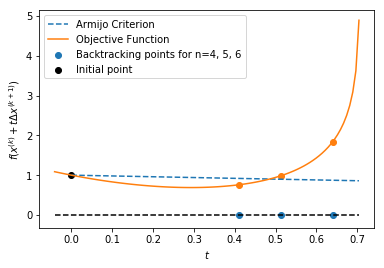

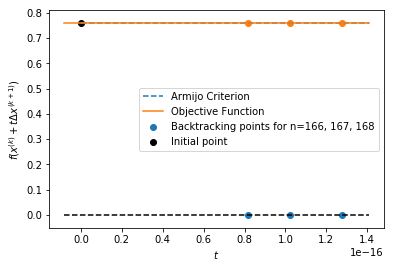

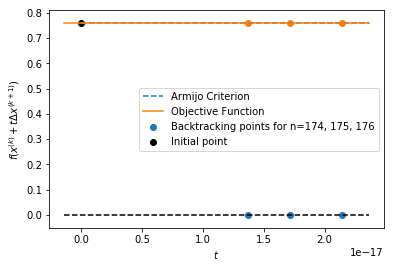

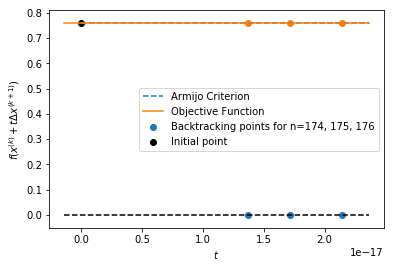

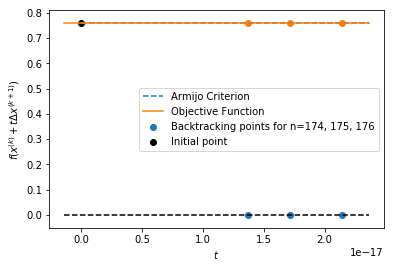

/Users/n8/anaconda/lib/python3.5/site-packages/ipykernel_launcher.py:94: RuntimeWarning: invalid value encountered in log


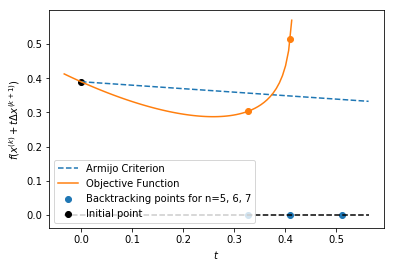

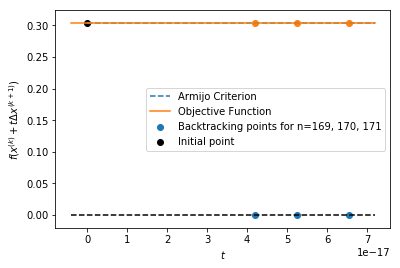

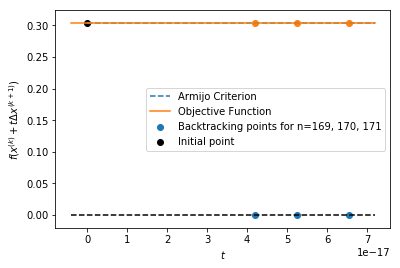

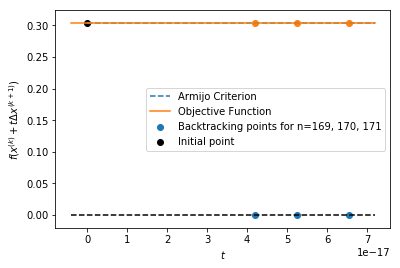

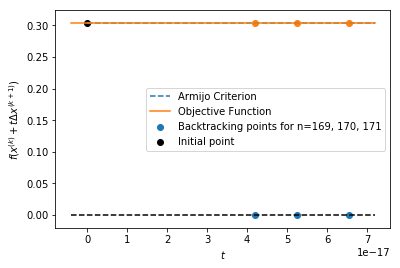

/Users/n8/anaconda/lib/python3.5/site-packages/ipykernel_launcher.py:106: RuntimeWarning: invalid value encountered in log


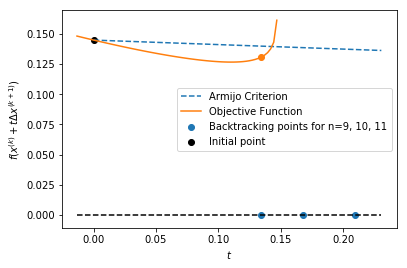

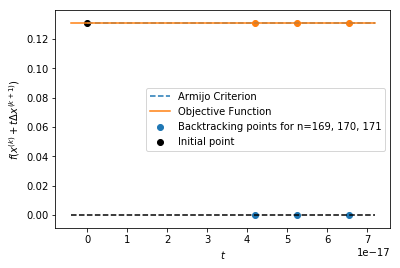

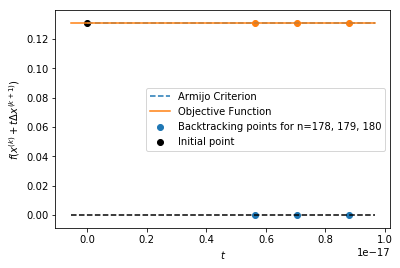

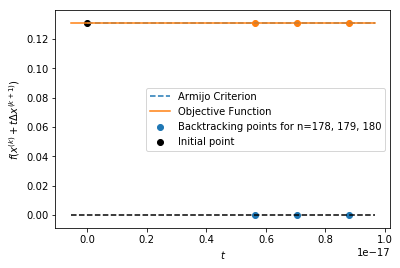

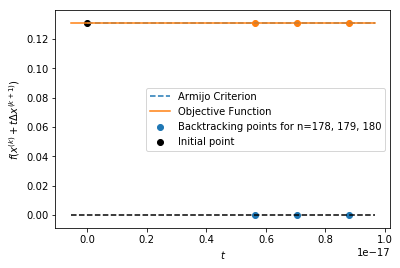

[[ 0.01        0.42369764  0.42369764  0.42369764  0.42369764  0.42369764]
 [-0.01        0.39550236  0.39550236  0.39550236  0.39550236  0.39550236]
 [ 0.          0.          0.          0.          0.          0.        ]]


<IPython.core.display.Javascript object>

In [6]:
import numpy as np
import matplotlib.pyplot as plt

def backtracking(x0, dx, f, df0, alpha=0.2, beta=0.8, verbose=False):
    '''
    Backtracking for general functions with illustrations
    :param x0: Previous point from backtracking, or initial guess
    :param dx: Incremental factor for updating x0
    :param f: Objective function
    :param df0: Gradient of f at x0
    :param alpha: Sloping factor of stopping criterion
    :param beta: "Agressiveness" parameter for backtracking steps
    :param verbose: Boolean for providing plots and data
    :return: x1, the next iterate in backtracking
    '''

    # Note that the definition below requires that dx and df0 have the same shape
    delta = alpha * np.sum(dx * df0) # A general, but memory intensive inner product
    
    t = 1 # Initialize t=beta^0
    f0 = f(x0) # Evaluate for future use
    x = x0 + dx # Initialize x_{0, inner}
    fx = f(x)
    
    if verbose:
        n=0
        xs = [x]
        fs = [fx]
        ts = [1] * 3
    
    while (not np.isfinite(fx)) or f0 + delta * t < fx:
        t = beta * t
        x = x0 + t * dx
        fx = f(x)
    ###################################### 
    
        if verbose:
            n += 1
            xs.append(x)
            fs.append(fx)
            ts.append(t)
            ts.pop(0)
            
    if verbose:
        # Display the function along the line search direction as a function of t
        s = np.linspace(-0.1*ts[-1], 1.1*ts[0], 100)
        xi = [0, 1.1*ts[0]]
        fxi = [f0, f0 + 1.1*ts[0]*delta]   
        y = np.zeros(len(s))
        
        for i in range(len(s)):
            y[i] = f(x0 + s[i]*dx) # Slow for vectorized functions

        plt.figure('Backtracking illustration')
        arm, =plt.plot(xi, fxi, '--', label='Armijo Criterion')
        fcn, =plt.plot(s, y, label='Objective Function')
        plt.plot([s[0], s[-1]], [0, 0], 'k--')
        pts =plt.scatter(ts, [0 for p in ts], label='Backtracking points for n=%d, %d, %d' % (n, n+1, n+2))
        plt.scatter(ts, [f(x0 + q*dx) for q in ts] , label='Backtracking values for n=%d, %d, %d' % (n, n+1, n+2))
        init =plt.scatter([0], [f0], color='black', label='Initial point')
        plt.xlabel('$t$')
        plt.ylabel('$f(x^{(k)}+t\Delta x^{(k+1)})$')
        plt.legend(handles=[arm, fcn, pts, init])
        plt.show()
        
        return x, xs, fs
    
    else:
        return x

# Two steps of the log barrier method

fun = lambda x: ((x[0]-1)**2 + (x[1]-1)**2)/2
dfun = lambda x: x-1

h = lambda x: np.sum(x*x)-1
dh = lambda x: 2*x

lb1 = lambda x: fun(x) - 1*np.log(-h(x))
dlb1 = lambda x: dfun(x) + 1*dh(x)/h(x)

alpha = 0.1
beta = 0.8

x1 = np.zeros((3, 6))
x1[:2,0] = np.array([0.01, -0.01])

x1[:2, 1], xs, fs = backtracking(x1[:2,0], -dlb1(x1[:2,0]), lb1, dlb1(x1[:2,0]), alpha=alpha, beta=beta, verbose=True)
x1[:2, 2], xs, fs = backtracking(x1[:2, 1], -dlb1(x1[:2,1]), lb1, dlb1(x1[:2,1]), alpha=alpha, beta=beta, verbose=True)
x1[:2, 3], xs, fs = backtracking(x1[:2, 2], -dlb1(x1[:2,2]), lb1, dlb1(x1[:2,2]), alpha=alpha, beta=beta, verbose=True)
x1[:2, 4], xs, fs = backtracking(x1[:2, 3], -dlb1(x1[:2,3]), lb1, dlb1(x1[:2,3]), alpha=alpha, beta=beta, verbose=True)
x1[:2, 5], xs, fs = backtracking(x1[:2, 4], -dlb1(x1[:2,4]), lb1, dlb1(x1[:2,4]), alpha=alpha, beta=beta, verbose=True)

lb2 = lambda x: fun(x) - 0.1*np.log(-h(x))
dlb2 = lambda x: dfun(x) + 0.1*dh(x)/h(x)

x2 = np.zeros((3, 6))
x2[:2,0] = x1[:2, 5] # initialize at the output of previous step

x2[:2, 1], xs, fs = backtracking(x2[:2,0], -dlb2(x2[:2,0]), lb2, dlb2(x2[:2,0]), alpha=alpha, beta=beta, verbose=True)
x2[:2, 2], xs, fs = backtracking(x2[:2, 1], -dlb2(x2[:2,1]), lb2, dlb2(x2[:2,1]), alpha=alpha, beta=beta, verbose=True)
x2[:2, 3], xs, fs = backtracking(x2[:2, 2], -dlb2(x2[:2,2]), lb2, dlb2(x2[:2,2]), alpha=alpha, beta=beta, verbose=True)
x2[:2, 4], xs, fs = backtracking(x2[:2, 3], -dlb2(x2[:2,3]), lb2, dlb2(x2[:2,3]), alpha=alpha, beta=beta, verbose=True)
x2[:2, 5], xs, fs = backtracking(x2[:2, 4], -dlb2(x2[:2,4]), lb2, dlb2(x2[:2,4]), alpha=alpha, beta=beta, verbose=True)

lb3 = lambda x: fun(x) - 0.01*np.log(-h(x))
dlb3 = lambda x: dfun(x) + 0.01*dh(x)/h(x)

x3 = np.zeros((3, 6))
x3[:2,0] = x2[:2, 5] # initialize at the output of previous step

x3[:2, 1], xs, fs = backtracking(x3[:2, 0], -dlb3(x3[:2,0]), lb3, dlb3(x3[:2,0]), alpha=alpha, beta=beta, verbose=True)
x3[:2, 2], xs, fs = backtracking(x3[:2, 1], -dlb3(x3[:2,1]), lb3, dlb3(x3[:2,1]), alpha=alpha, beta=beta, verbose=True)
x3[:2, 3], xs, fs = backtracking(x3[:2, 2], -dlb3(x3[:2,2]), lb3, dlb2(x3[:2,2]), alpha=alpha, beta=beta, verbose=True)
x3[:2, 4], xs, fs = backtracking(x3[:2, 3], -dlb3(x3[:2,3]), lb3, dlb2(x3[:2,3]), alpha=alpha, beta=beta, verbose=True)
x3[:2, 5], xs, fs = backtracking(x3[:2, 4], -dlb3(x3[:2,4]), lb3, dlb2(x3[:2,4]), alpha=alpha, beta=beta, verbose=True)

print(x1)

jsglobal(LB1=x1.T)


In [7]:
%%javascript

with_mathbox(element, function(mathbox) {
    
    var tlb = 1.0
    
    var fcn = function(x, y) {
        return (Math.pow(x-1,2) + Math.pow(y-1, 2))/2;
    }
    
    var logbarrier = function(x, y) {
        return -Math.log(1 - x*x - y*y);
    }
    
    var view = plotGraph(mathbox, fcn, 'x', 'y', 'f(x,y)', [[-1.5, 1.5], [-1, 3], [-1.5, 1.5]]);
     
    addClosedCurve(view,
             [0, 6.4],
             function(t){return Math.cos(t);},
             function(t){return Math.sin(t);},
             function(t){return 0;},
             0x3090FF
            );
    
    addSurface(view, 
               [0, 6.4],
               [0, 1],
              function(s, t) {return t*Math.cos(s);},
              function(s, t) {return t*Math.sin(s);},
              function(s, t) {return 0;},
              0x3090FF,
              0.75)
    
    addSurface(view, 
               [0, 6.4],
               [0, 0.99],
              function(s, t) {return t*Math.cos(s);},
              function(s, t) {return t*Math.sin(s);},
              function(s, t) {return fcn(t*Math.cos(s), t*Math.sin(s)) + tlb*logbarrier(t*Math.cos(s), t*Math.sin(s));},
              0xFF8C00,
              0.9)
    
    addSequence(view, LB1, 0xFF8C0);
})

<IPython.core.display.Javascript object>

### Group Problems

Consider the following programs:

$$
(P_1): \min 2x^2 + 2xy + 2y^2\text{ subject to } x^2+y^2\leq 1, x\geq 0, y\geq 0
$$

$$
(P_2): \min (x-1)^2 + (y-2)^2\text{ subject to } xy\leq 1, x\geq 0, y\geq 0
$$

$$
(P_3): \max x^{1/4} y^{3/4}\text{ subject to } x+y\leq 1, x\geq 0, y\geq 0
$$

$$
(P_4): \min 2x + 3y\text{ subject to } \begin{pmatrix} x & y\\ y & 1-x\end{pmatrix}\text{ is positive semidefinite}
$$

1. Write out the KKT conditions for $P_1$
2. Write out the KKT conditions for $P_2$
3. Write out the KKT conditions for $P_3$
4. Write out the KKT conditions for $P_4$
5. Find an interior point for $P_1$, write down the log barrier penalized objective in terms of $x, y, t$, and compute the gradient of this function with respect to $(x,y)$.
6. Find an interior point for $P_2$, write down the log barrier penalized objective in terms of $x, y, t$, and compute the gradient of this function with respect to $(x,y)$.
7. Find an interior point for $P_3$, write down the log barrier penalized objective in terms of $x, y, t$, and compute the gradient of this function with respect to $(x,y)$.
8. Find an interior point for $P_4$, write down the log barrier penalized objective in terms of $x, y, t$, and compute the gradient of this function with respect to $(x,y)$.



